# DATASET과 DATALOADER 


In [1]:
import torch 
from torch.utils.data import Dataset 
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt

## 데이터셋 불러오기
- TorchVision Fashion-MNIST 데이터셋을 불러오는 예제
- Fashion-MNIST는 흑백의 28x28 이미지와 10개의 class 중 하나의 label로 구성 
- datasets.FashionMNIST(
-   매개변수 
-   root = 학습/테스트 데이터가 저장되는 경로
-   train = 학습용 또는 테스트용 데이터셋 여부를 지정 True / False
-   download = True 시 root 에 데이터가 없는 경우 인터넷에서 다운 
-   transform, target_transform은 feature과 label, transform을 지정
)

In [2]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download  = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data", 
    train = False,
    download = True,
    transform = ToTensor()
)

26422272it [00:03, 7978649.97it/s]                              


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



29696it [00:00, 107806.62it/s]                          


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



4422656it [00:02, 1942631.19it/s]                            


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



6144it [00:00, 5976299.58it/s]          
d:\sources\GitRepository\Pytorch_tutorial\venv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



# 데이터셋을 반복하고 시각화 하기
## Dataset에 list 처럼 직접 접근 할 수 있습니다. 

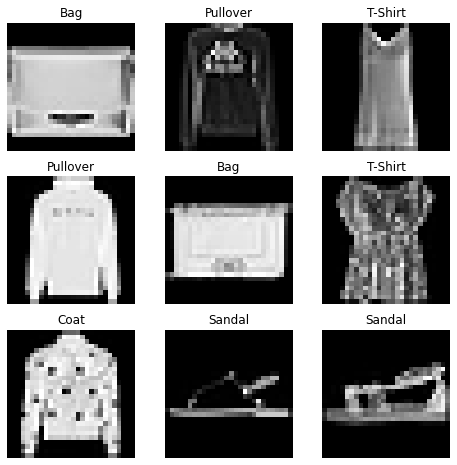

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8,8))

for i in range(1, 10): 
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(3, 3, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")

plt.show()


# 파일에서 사용자 정의 데이터셋 만들기 
## 사용자 정의 Dataset 클래스는 !반드시! 3개 함수를 구현해야합니다.
## ____init__ __ 
## ____len__ __
## ____getitem__ __
## FashionMNIST 이미지들은 img_dir 디렉토리에 저장되며 
## label은 annotations_file csv 파일에 별도로 저장

In [ ]:
import os 
import pandas as pd 
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self) 
